# **Análise exploratória**

Lembrando que o propósito deste artigo é:

Apresentar o desafio.
Mostrar algumas análises feitas.
Dicas
Vamos ao que interessa !

**1 - Iniciando:**
É necessário instalar várias coisas, porém para facilitar a nossa vida podemos instalar o ANACONDA, com ele será instalado as bibliotecas necessárias, o Python e o Jupyter Notebook.

Ou mais fácil ainda, podemos usar o Colab do Google, onde é necessário somente uma conta Google para ter um “Jupyter notebook” no navegador.

**2 - Entendendo o nosso problema:**
O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

matemática: 3 
ciências da natureza: 2
linguagens e códigos: 1.5
ciências humanas: 1
redação: 3

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

**3 — Mão na massa**

**Importando os dados**

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics

df_train = pd.read_csv('../data/train.csv', sep="," , encoding="UTF8" )
df_test = pd.read_csv('../data/test.csv', sep="," , encoding="UTF8" )

**Quais colunas temos na base de test para trabalhar ?**

In [2]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

**Vamos verificar quais features tem uma maior correlação com o nosso target (NU_NOTA_MT)**

In [3]:
df_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
TP_ESTADO_CIVIL,0.003678,NaN,0.020813,0.020947,0.533462,1.000000,0.004950,-0.012160,-0.000046,0.000243,...,-0.017455,-0.009670,-0.016354,-0.002580,0.025840,0.002294,-0.014725,-0.066346,-0.022736,0.108771
TP_COR_RACA,0.005707,NaN,-0.236178,-0.234786,0.009675,0.004950,1.000000,0.015761,-0.253524,-0.252162,...,-0.010398,0.004446,0.031514,0.026052,0.055185,0.086642,0.069298,0.046830,0.053556,0.020966
TP_NACIONALIDADE,-0.006217,NaN,0.009710,0.009433,-0.017713,-0.012160,0.015761,1.000000,NaN,NaN,...,0.013515,0.001575,-0.003419,-0.018290,-0.005285,0.032588,0.024112,0.011327,0.014847,0.008132
CO_MUNICIPIO_NASCIMENTO,-0.004527,NaN,0.865294,0.864791,-0.030711,-0.000046,-0.253524,NaN,1.000000,0.999860,...,-0.001793,-0.043358,-0.051102,-0.057239,-0.046998,-0.024174,-0.038666,-0.097273,-0.081490,-0.042237
CO_UF_NASCIMENTO,-0.004615,NaN,0.865216,0.864919,-0.030259,0.000243,-0.252162,NaN,0.999860,1.000000,...,-0.002089,-0.043492,-0.051094,-0.056401,-0.047069,-0.024201,-0.038305,-0.096666,-0.080963,-0.042134


As features com maiores correlações em relação ao nosso Target (NU_NOTA_MT) serão as melhores a serem usadas, porém somente a seleção delas não vai garantir que sua análise seja satisfatória. De qualquer forma, vamos se atentar a selecionar as melhores nesse momento.


**Verificar como está as distribuições**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']



**Verificando os valores nulos:**

In [5]:
df_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

**São muitos valores nulos!**

**Criando um heatmap das Features incluindo NU_NOTA_MT para vermos as nossas correlações:**


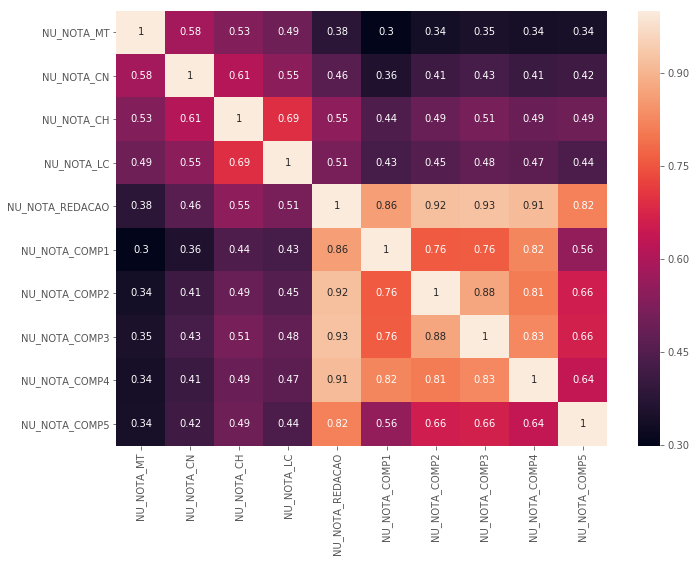

In [6]:
corr = df_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})


**Criaremos alguns gráficos para ver a distribuição dos dados:**

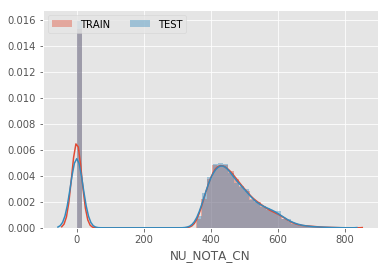

In [7]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');


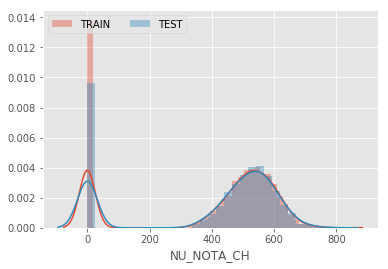

In [8]:
x0 = df_train['NU_NOTA_CH'].fillna(0)
x1 = df_test['NU_NOTA_CH'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

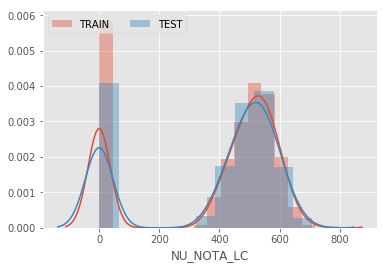

In [9]:
x0 = df_train['NU_NOTA_LC'].fillna(0)
x1 = df_test['NU_NOTA_LC'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

Como podemos ver há uma grande parte de notas zeradas pois colocamos os valores null como 0.

O que vai ser feito daqui para frente fica a critério do cientista de dados, entre as alternativas são:

Aplicar a média nas notas.
Deixar zerado.
Remover do dataset de treino esse valores.
Todas essa opções vão gerar resultados diferentes do dataset. A minha escolha nesse problema foi remover essas notas do dataset de treino. Dessa forma meu modelo vai ser treinado numa base com distribuição ‘normal’.

Para a composição da nota de redação vou aplicar o valor 0, devido ele não ter atingido ao critério, a nota é zero mesmo.

Obs: Todos esses assumptions já estão sendo feitos após eu ler exaustivamente o dicionário de dados, o qual eu recomendo fortemente que você faça antes de começar qualquer análise em um dataset (caso odicionário exista).

In [10]:
# Seleciona somente linhas com valores nesses 4 quesitos a baixo na base de train
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
]

**Vamos verificar os gráficos novamente**

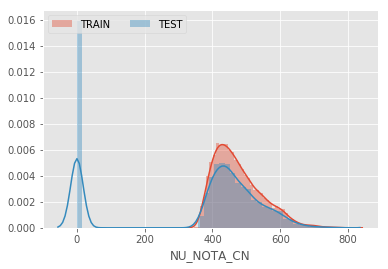

In [11]:

x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');


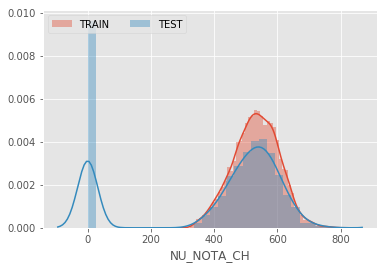

In [12]:
x0 = df_train['NU_NOTA_CH'].fillna(0)
x1 = df_test['NU_NOTA_CH'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

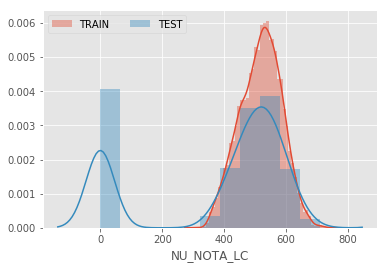

In [13]:
x0 = df_train['NU_NOTA_LC'].fillna(0)
x1 = df_test['NU_NOTA_LC'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

**Insight**: as provas do ENEM são feitas em dois dias, e nesses dois dias 2 cadernos são usados. A nota que estamos tentando estimar aqui é a nota de Matemática, sabendo disso se pegarmos o campo ‘TP_PRESENCA_LC’ o qual confirma ou não a presença do aluno na prova, pode ser muito útil na nossa análise.
Podemos assumir que se o aluno não estava presente em “Linguagens, Códigos e suas Tecnologias”, também não estava presente na de Matemática, a qual é no mesmo dia.

Dessa forma você pode separar os dados, e assumir todas aquelas inscrições obtiveram a nota zero em Matemática.

Selecionando somente valores diferentes de 0 e não nulos na base de test:

In [14]:
df_test = df_test.loc[
      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull())      & (df_test['NU_NOTA_CH'] != 0) 
    & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
]


**Verificando a quantidade de notas ‘nulls’ na base de test:**

In [15]:
df_test[features].isnull().sum()


NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

**Agora sim! os dados parecem bons para usar no nosso modelo, vamos gerar os gráficos novamente.**

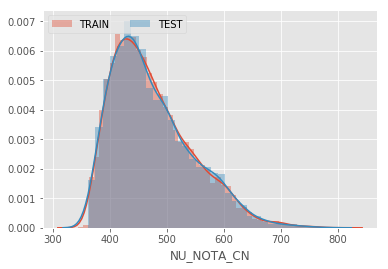

In [16]:
x0 = df_train['NU_NOTA_CN']
x1 = df_test['NU_NOTA_CN']


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');


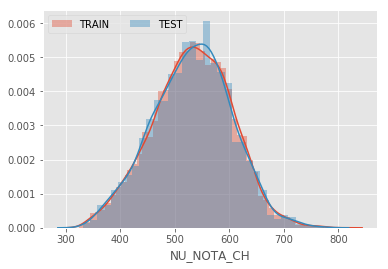

In [17]:
x0 = df_train['NU_NOTA_CH']
x1 = df_test['NU_NOTA_CH']

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');


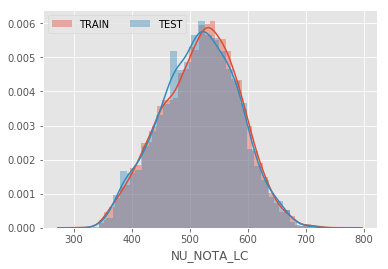

In [18]:
x0 = df_train['NU_NOTA_LC']
x1 = df_test['NU_NOTA_LC']


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');


Como podemos observar, agora temos dados muito mais homogêneos entre teste e treino do que quando iniciamos a nossa análise.



#Criando o modelo de regressão 

**Zerando os campos nulos de composição da nota de redação.**

In [19]:
df_test['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP5'].fillna(0,inplace=True)

df_train['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP5'].fillna(0,inplace=True)

Lembrando que selecionei essas Features para exemplificar o nosso modelo, você pode e deve fazer os seus testes. Selecionar/Testar/Criar faz parte do processo, e isso é o que toma mais parte da análise geralmente.

**Seguindo**:

    -Atribuir y_train ao meu target
    -Setar x test e x train com as features selecionadas
    -Normalizar os dados

In [20]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[features]
x_test = df_test[features]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

O modelo que usei para fazer a regressão, no caso foi o **RandomForestRegressor**. Mais informações sobre o modelo e os parâmetros você pode ver na  [documentação.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Abaixo um gráfico para problema/algoritmo:


In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)    



Abaixo um gráfico de problemas/algoritmos apenas para exemplificar:

![alt text](http://share.opsy.st/56e7090e92b6c-MathWorks_Figure+1_Machine+Learning+Types.jpg)

**Treinando o nosso modelo através do fit.**

In [22]:
regressor.fit(x_train, y_train) 


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

**Realizando a predição das notas da nossa base test:**



In [25]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

O **Codenation** não disponibiliza ou comenta qual o meio que o sistema avalia as notas. Dessa forma recomendo você criar o seu próprio método de avaliação e comparar com o score de submissão.

Eu usei o MAE, MSE E RSME do metrics para analisar, você pode achar a documentação aqui.

In [26]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))


MAE: 53.31348913
MSE: 4678.43225585
RMSE: 68.39906619


# Conclusão

O propósito aqui é estimular o pensamento analítico e exploratório dos dados. Tem alguns conceitos que não foram abordados, mas podem ser úteis em análises desse tipo.

- O [Feature engineering](https://en.wikipedia.org/wiki/Feature_engineering), que nada mais é a criação de features a partir de outras.

- AutoML: [Google](https://cloud.google.com/ml-engine/?hl=pt-br), [IBM](https://www.ibm.com/cloud/watson-studio) e [Amazon](https://aws.amazon.com/pt/machine-learning/) tem seus próprios serviços de Machine Learning, onde prometem (Já entregam) muita facilidade em gerar modelos.


---

**Links úteis**



*  Codenation - https://www.codenation.dev
*  Google Colab -  https://colab.research.google.com
*  Anaconda - https://anaconda.org
* Feature Engineering  - https://towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219








**Minha participação no desafio**

O desafio do *Codenation*  me estimulou a pensar fora da caixa, pensar em alternativas de features, aprender bibliotecas novas e pesquisar muito!
Consegui uma posição final de **6º** com um score de **93.86%** , o qual eu achei muito bacana para uma primeira participação.

---

Obrigado por ler esse artigo!


Wesley Watanabe

**Linkedin** - https://www.linkedin.com/in/wesleywatanabe/